In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
import scipy

In [ ]:
import os
import cv2

def resize_images(folder_path, target_size):
    # Get list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    for image_file in image_files:
        # Read the image
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path)
        
        # Resize the image
        resized_img = cv2.resize(img, target_size)
        
        # Save the resized image back
        cv2.imwrite(image_path, resized_img)
        print(f"{image_file} resized to {target_size}")

# Specify the target size
target_size = (256, 256)  # Specify the dimensions you want, e.g., (width, height)

# Paths to the folders containing images
folder1_path = "BirdVsDrone/Birds"
folder2_path = "BirdVsDrone/Drones"

# Resize images in the first folder
resize_images(folder1_path, target_size)

# Resize images in the second folder
resize_images(folder2_path, target_size)


In [3]:
IMAGE_WIDTH = 416
IMAGE_HEIGHT = 416
BATCH_SIZE = 32

In [4]:
train_data_dir = "/kaggle/input/dronesnew/Train"
val_data_dir = "/kaggle/input/dronesnew/Val"
test_data_dir = "/kaggle/input/dronesnew/Test"

In [6]:
img_width, img_height = 256, 256
batch_size = 32
# Create data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2866 images belonging to 2 classes.
Found 796 images belonging to 2 classes.
Found 597 images belonging to 2 classes.


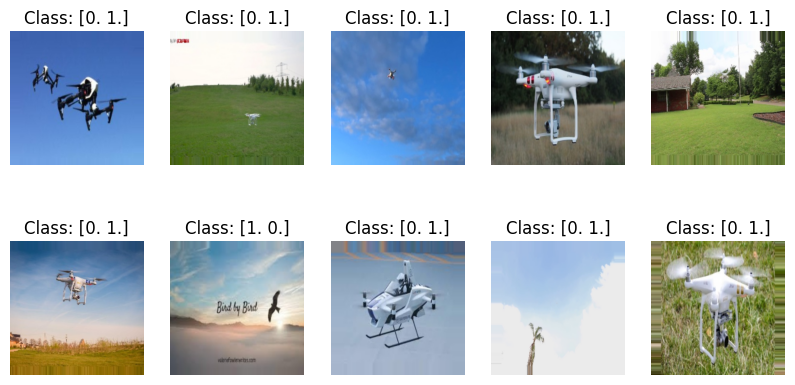

In [11]:
import matplotlib.pyplot as plt

# Get 10 samples from the generator
num_samples = 10
images, labels = next(train_generator)

# Plot the images
plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i])
    plt.title('Class: {}'.format(labels[i]))
    plt.axis('off')
plt.show()

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,234 (56.61 MB)

 Trainable params: 14,839,234 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from keras.callbacks import ReduceLROnPlateau
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
history1 = model.fit(
    train_generator,
    steps_per_epoch=None,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=None,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    shuffle=True
    )




Epoch 1/50







20/20 [==============================] - 56s 3s/step - loss: 1.2475 - accuracy: 0.6115 - val_loss: 0.6470 - val_accuracy: 0.5477 - lr: 0.0010

Epoch 2/50

20/20 [==============================] - 29s 1s/step - loss: 0.5098 - accuracy: 0.7468 - val_loss: 0.5668 - val_accuracy: 0.7387 - lr: 0.0010

Epoch 3/50

20/20 [==============================] - 26s 1s/step - loss: 0.4602 - accuracy: 0.7643 - val_loss: 0.6738 - val_accuracy: 0.6935 - lr: 0.0010

Epoch 4/50

20/20 [==============================] - 29s 1s/step - loss: 0.4013 - accuracy: 0.8328 - val_loss: 0.6085 - val_accuracy: 0.7136 - lr: 0.0010

Epoch 5/50

20/20 [==============================] - 40s 2s/step - loss: 0.4038 - accuracy: 0.8248 - val_loss: 0.5679 - val_accuracy: 0.7337 - lr: 0.0010

Epoch 6/50

20/20 [==============================] - 33s 2s/step - loss: 0.3536 - accuracy: 0.8535 - val_loss: 0.5248 - val_accuracy: 0.7688 - lr: 3.0000e-04

Epoch 7/50

20/20 [==============================] - 27s 

In [8]:
model.save('cnn.h5')

C:\Users\blruc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

  saving_api.save_model(


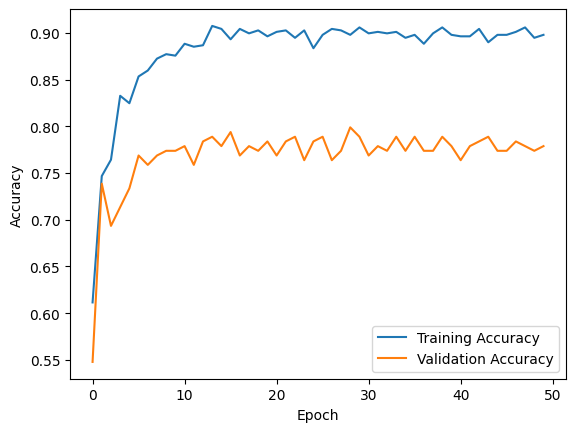

In [9]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict classes for the validation set
y_true = validation_generator.classes
y_pred_prob = model.predict(validation_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

7/7 [==============================] - 4s 516ms/step


In [2]:
from sklearn.metrics import classification_report

# Evaluate the model
test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# Make predictions
predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int)

# Get true labels
true_labels = test_generator.classes

# Classification report
print(classification_report(true_labels, y_pred))


              precision    recall  f1-score   support

           0       0.89      1.00      0.93       300
           1       1.00      0.88      0.93       297

    accuracy                           0.93       597
   macro avg       0.95      0.94      0.93       597
weighted avg       0.95      0.94      0.93       597



Confusion Matrix:
[[300   0]
 [ 37 260]]


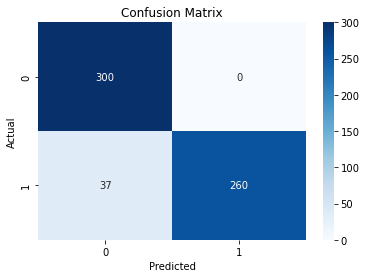

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(true_labels, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

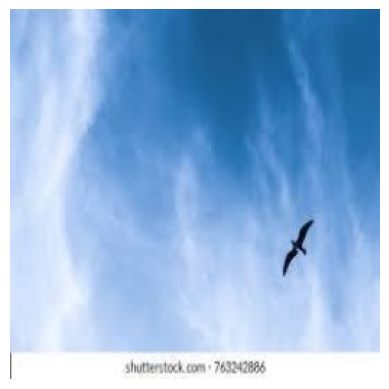

1/1 [==============================] - 0s 182ms/step

Predicted class: 0

Predicted disease: Birds


In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

# Load and preprocess the image
img_path = 'Val/Birds/singleBirdinsky315.jpeg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Get model prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Print the predicted class
print("Predicted class:", predicted_class)

# Map the class index to the actual class name (you may need a mapping based on your dataset)
class_labels = {0: 'Birds', 1: 'Drones'}  # Replace with your actual class names

# Print the predicted disease
predicted_disease = class_labels.get(predicted_class, 'Unknown')
print("Predicted disease:", predicted_disease)


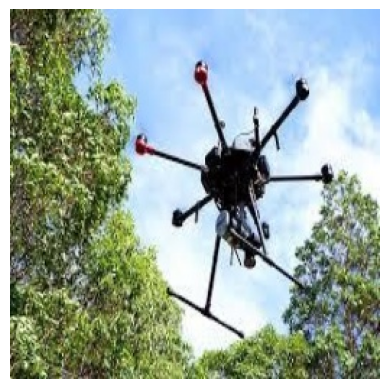

1/1 [==============================] - 0s 48ms/step

Predicted class: 1

Predicted disease: Drones


In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

# Load and preprocess the image
img_path = 'Val/Drones/singleDronesinsky139.jpeg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Get model prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Print the predicted class
print("Predicted class:", predicted_class)

# Map the class index to the actual class name (you may need a mapping based on your dataset)
class_labels = {0: 'Birds', 1: 'Drones'}  # Replace with your actual class names

# Print the predicted disease
predicted_class = class_labels.get(predicted_class, 'Unknown')
print("Predicted Class:", predicted_class)
